# Classification des Iris

Dans cet exemple, nous allons développer quelques modèles d'apprentissage automatique afin de classifier différentes espèces d'Iris, en particulier l'iris Setosa (iris de l'Alaska), Versicolor (ou clajeux) et Virginica (de Virginie).

Nous allons résoudre ce problème pas-à-pas afin de bien comprendre les différentes étapes mises en oeuvre dans l'apprentissage automatique, ainsi que certaines notions mathématiques associées.

La [base données des Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) fait partie du module Python [Sci-kit learn](https://scikit-learn.org/stable/).

![Iris Versicolor](images/iris_versicolor.png "Iris Versicolor")

La base de données contient 50 échantillons de chacune des espèces d'iris mentionnées précédemment. Quatre caractéristiques ont été mesurées sur chaque échantillon : la longueur et la largeur des pétales et des sépales (en centimètres). Ces caractéristiques peuvent être utilisées pour classifier ou prédire l'espèce de l'iris. 


In [49]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

## Chargement des données

In [50]:
iris = datasets.load_iris()

In [ ]:
print(iris.DESCR)

In [ ]:
iris.target_names

In [ ]:
len(iris.data)

In [ ]:
iris.data

In [ ]:
iris.target

## Affichage des longueurs et largeurs des sépales

Text(0.5, 1.0, 'Distribution des dimensions des Sépales')

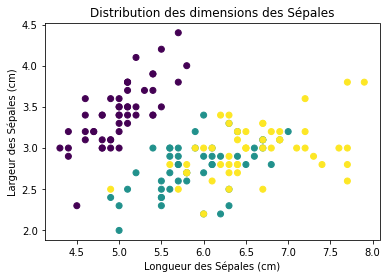

In [ ]:
# Enregistrement dans la variable X des longueurs des sépales
# et dans la variable Y des largeurs des sépales
X = iris.data[:, 0]
Y = iris.data[:, 1]

# Les masques contenus dans le tableau iris.target vont être utlisés pour donner une couleur à chaque espèce d'iris
Masque_Couleur = iris.target

plt.scatter(X, Y, c=Masque_Couleur)
plt.xlabel('Longueur des Sépales (cm)')
plt.ylabel('Largeur des Sépales (cm)')
plt.title('Distribution des dimensions des Sépales')

## Affichage des longueurs et largeurs des pétales

In [ ]:
# Code à compléter

## Modèle de Regression Logistique (Regression Logistic model)

Nous allons créer un modèle qui va prédire si un échantillon appartient à une des catégories des espèces d'iris ou non.

La structure de ce modèle est la suivante :

![Regression logistique](images/perceptron75.png "Perceptron")

## Function Sigmoïde (Sigmoide function)

La [fonction Sigmoïde](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques)) est utilisée en regression logistique et dans les neurones artificiels. C'est une manière de transformer des valeurs continues en valeurs binaires. Cette fonction est également appellée "Fonction d'activation" dans les réseaux de neurones. De nombreux types de fonctions d'activations sont utilisés aujourd'hui.

Text(0.5, 1.0, 'Fonction Sigmoïde')

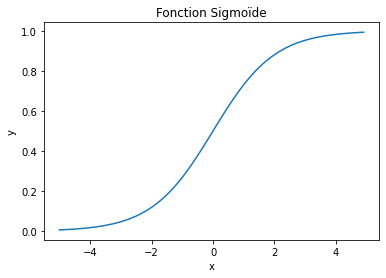

In [ ]:
def sigmoid(z):
  return 1.0/(1 + math.exp(-z))

x = [i * 0.1 for i in range(-50, 50)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fonction Sigmoïde')

## Fonction de prédiction (Prediction Function)

Cette fonction prend un échantillon et multiplie les caractéristiques par les poids, ajoute l'offset et passe la valeur obtenue dans la fonction Sigmoïde.

Cette fonction sera utilisée pour déterminer les poids et l'offset à utliser pendant la phase d'apprentissage, ainsi que pour faire les prédictions une fois l'entrainement du modèle terminé.


In [ ]:
def predict(echantillon):
  result  = 0.0
  for i in range(len(echantillon)):
    result = result + poids[i] * echantillon[i]
    
  result = result + offset
  return sigmoid(result)

## Fonctions de Perte et de Coût (Loss and Cost Functions)

La fonction de perte (Loss function en Anglais) compare la valeur prédite à partir d'un échantillon (la valeur prédite est calculée par la fonction de prédiction) avec la valeur attendue (la valeur qu'on devrait trouver si la fonction de prédiction fonctionnait correctement - ce qui n'est pas le cas au débit de l'apprentissage !).

Si la valeur absolue de la différence entre ce qui est prédit et ce qui est attendu est grande, la fonction de perte doit retourner une grande valeur. Inversement, si la valeur absolue de la différence entre ce qui est prédit et ce qui est attendu est faible, la fonction de perte doit retourner une faible valeur.

Pour synthétiser : Plus la fonction de prédiction est mauvaise, plus les pertes sont élevées :

<img src="https://github.com/AlexandreBourrieau/ML-F1/blob/master/Regression/images/chaudFroid.png?raw=1" width="500"/>

La fonction de perte n'est pas juste la valeur absolue de la différence mais est plus élaborée, afin de rendre les calculs plus rapides et l'entrainement du modèle plus simple.

$$\mathcal L(y, \hat y) = -(y \ln \hat y + (1-y) \ln (1 - \hat y))$$

Avec $\mathcal L$ : les pertes ; $y$ : la valeur attendue ; et $\hat y$ la valeur prédite obtenue par le modèle.

In [ ]:
def pertes(y_attendu, y_predit):
  return -(y_attendu * math.log(y_predit) + (1.0 - y_attendu) * math.log(1 - y_predit))

Nous pouvons regarder à quoi ressemble cette fonction pour une valeur attendue fixe (ici 0.9) en fonction des valeurs prédites (ici allant de 0.1 à 1).

On observe bien que les pertes diminuent lorsque la valeur prédite se rapproche la valeur attendue :

Text(0.5, 1.0, 'Pertes en fonction des valeurs prédites pour une valeur attendue de 0.90')

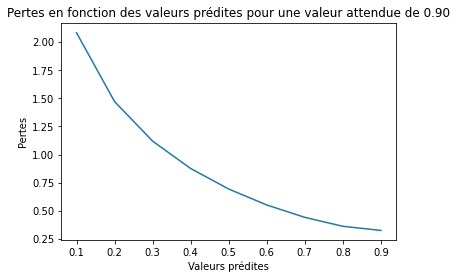

In [ ]:
y_attendu = 0.9
x = [i * 0.1 for i in range(1, 10)]
y = [pertes(y_attendu, yp) for yp in x]
plt.plot(x, y)
plt.xlabel('Valeurs prédites')
plt.ylabel('Pertes')
plt.title('Pertes en fonction des valeurs prédites pour une valeur attendue de %0.2f' % y_attendu)

La fonction de coût est la valeur moyenne des pertes pour tous les échantillons testés. Ainsi, par exemple si on a testé 10 échantillons avec les résultats suivants alors le coût sera de 0.3 :

<img src="https://github.com/AlexandreBourrieau/ML-F1/blob/master/Regression/images/Tableau.png?raw=1" width="500"/>

Mathématiquement, pour un nombre m d'échantillons testés, le coût (noté J) peut être exprimé de la manière suivante :

$$\mathcal J = \frac{1}{m} \sum_{i=0}^{m} \mathcal L(y, \hat y)$$

## Algorithme du Gradient (Gradient Descent Algorithm)

[L'algorithme du gradient](https://fr.wikipedia.org/wiki/Algorithme_du_gradient) a pour but d'ajuster les poids et l'offset du modèle afin de minimiser le coût, et donc d'obtenir le modèle le plus juste possible. L'algorithme du gradient calcule la dérivée (gradient), c'est-à-dire la pente, de la fonction de coût pour différentes valeurs de poids et d'offsets.

Les équations générales sont les suivantes : 

$$w_{k+1} = w_{k} - \alpha J'(w)$$
$$b_{k+1} = b_{k} - \alpha J'(b)$$

Avec :  
$\;\;\;\;\;\;\;$ $w_{k}$ et $b_{k}$ les valeurs courantes des poids et de l'offset  
$\;\;\;\;\;\;\;$ $w_{k+}$ et $b_{k+1}$ les valeurs de la prochaine itération.  
$\;\;\;\;\;\;\;$ $J'(w)$ la dérivée de la fonction de coût par rapport aux poids  
$\;\;\;\;\;\;\;$ $J'(b)$ la dérivée de la fonction de coût par rapport à l'offset


Le nombre $\alpha$ est le taux d'apprentissage qui permet de paramétrer la manière dont va s'exécuter l'algorithme. Si le taux d'apprentissage est trop petit, le modèle va mettre beaucoup de temps à s'entrainer. Si ce taux est trop grand, le modèle risque de ne jamais trouver de solution.

Considérons un exemple simple :

$$J(w) = w^2 + \frac{w}{2}$$

Text(0.5, 1.0, 'Fonction Coût (J)')

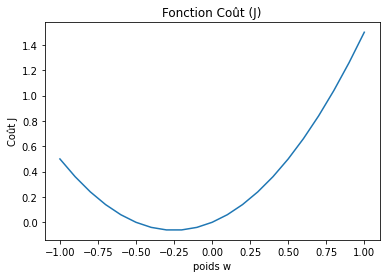

In [ ]:
def cout(w):
    return w**2 + w/2.0

w = [i * 0.1 for i in range(-10, 11)]
J = [cout(wi) for wi in w]
plt.plot(w, J)
plt.xlabel('poids w')
plt.ylabel('Coût J')
plt.title('Fonction Coût (J)')

La dérivée de cette fonction par rapport au poids $w$ est :

$$J'(w) = 2w + 0.5$$

Pour trouver le minimum avec l'algorithme du gradient, nous devons itérer cette équation :

$$w_{k+1} = w_{k} - \alpha J'(w)$$

Minimum -0.25, -0.06
Derivée (gradient) 0.00


Text(0.5, 1.0, 'Fonction parabolique')

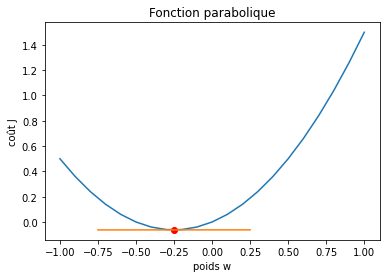

In [ ]:
w_k = 0.0

taux_apprentissage = 0.8

def derive(w):
  return 2*w + 0.5

for i in range(15):
    gradient = derive(w_k)
    w_k = w_k - taux_apprentissage*gradient

print('Minimum %0.2f, %0.2f' % (w_k, cout(w_k)))
print('Derivée (gradient) %0.2f' % gradient)

w = [i * 0.1 for i in range(-10, 11)]
J = [cout(wi) for wi in w]
plt.plot(w, J)
plt.xlabel('poids w')
plt.ylabel('coût J')
plt.plot(w_k, cout(w_k), 'ro')
line_x = [w_k - 0.5, w_k + 0.5]
line_y = [gradient*(wi-w_k)+cout(w_k) for wi in line_x]
plt.plot(line_x, line_y)
plt.title('Fonction parabolique')

## Rétropropagation du gradient

[La rétropropagation du gradient](https://fr.wikipedia.org/wiki/R%C3%A9tropropagation_du_gradient) est un algorithme très utlisé pour l'entrainement des modèles d'apprentissage automatique. Son objectif est de trouver les poids et l'offset qui minimisent les écarts entre les valeurs attendues et celles prédites par le modèle.

In [56]:
nbr_caracteristiques = 4

def entrainement_sur_une_iteration(echantillons, valeurs_attendues):
  cout = 0.0                          # initialise le coût à 0
  dw = [0.0] * nbr_caracteristiques   # dw permettra de stocker les variations des poids
  db = 0.0                            # db permettra de stocker la variation de l'offset

  global offset, poids

  m = len(echantillons)                   # m contient le nombre d'échantillons (150)
  for i in range(m):
    ech = echantillons[i]                 # ech contient le i-ème échantillon : [longueur_sépale, largeur_sépale, longueur_pétale, largeur_pétale]
    val_attendue = valeurs_attendues[i]   # val_attendue contient la valeur attendue pour cet echantillon que doit retourner le modèle (0 ou 1)
    valeur_predite = predict(ech)         # Appel de la fonction de prédiction pour calculer la valeur prédite par le modèle sur cet échantillon 
    cout = cout + pertes(valeur_attendue, valeur_predite)
    
    # dz est la variation (dérivée) de la fonction de perte
    dz = valeur_predite - valeur_attendue
    
    for j in range(len(poids)):
      dw[j] = dw[j] + ech[j] * dz
    db = db + dz
  
  cout = cout / m
  db = db / m
  offset = offset - taux_apprentissage*db
  for j in range(len(poids)):
    dw[j] = dw[j] / m
    poids[j] = poids[j] - taux_apprentissage*dw[j]
  
  return cout

## Training Algorithm

This algorithm with iterate through the training data many times and call the backpropagation function.

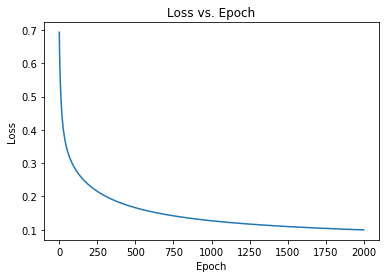

In [ ]:
# Model will "learn" values for the weights and biases

weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.1

epochs = 2000

x_train_samples = iris.data
y_train_samples = [1 if y == 2 else 0 for y in iris.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

## Make Predictions

Once the model is trained, it can be used to make predictions.

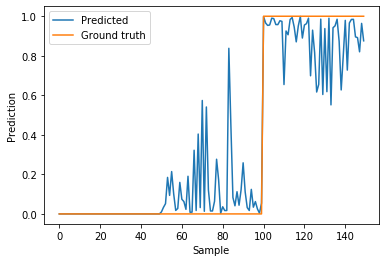

Accuracy: 98.00 %


In [ ]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))